In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('drug200.csv')
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [3]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [4]:
df.isnull().sum()


Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [5]:
df.describe()


,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


<Axes: >

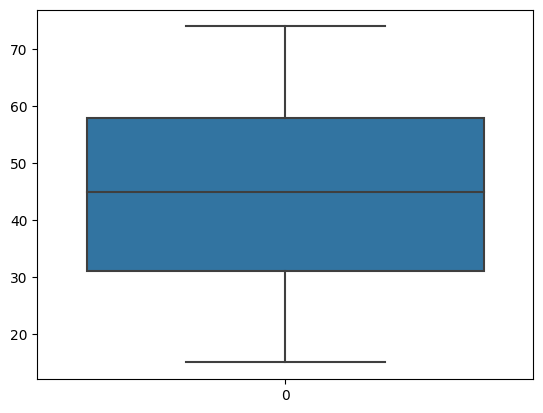

In [6]:
sns.boxplot(df.Age)

<Axes: >

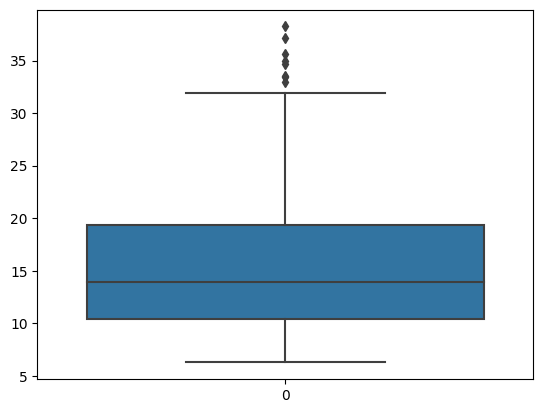

In [7]:
sns.boxplot(df.Na_to_K)


16.084485


<ipython-input-8-fe690e7cd8dc>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Na_to_K)


<Axes: xlabel='Na_to_K', ylabel='Density'>

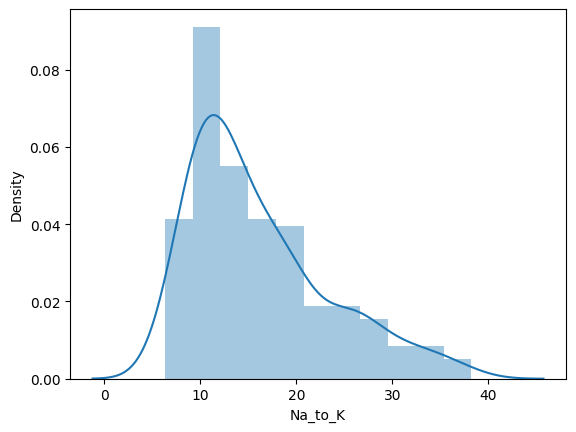

In [8]:
print(df.Na_to_K.mean())
q1 = df.Na_to_K.quantile(.25)
q3 = df.Na_to_K.quantile(.75)
IQR = q3-q1
uppeer_limit = q3+1.5*IQR
sns.distplot(df.Na_to_K)

In [9]:
df['Na_to_K']= np.where(df['Na_to_K']> uppeer_limit,16.08,df['Na_to_K'])

<Axes: >

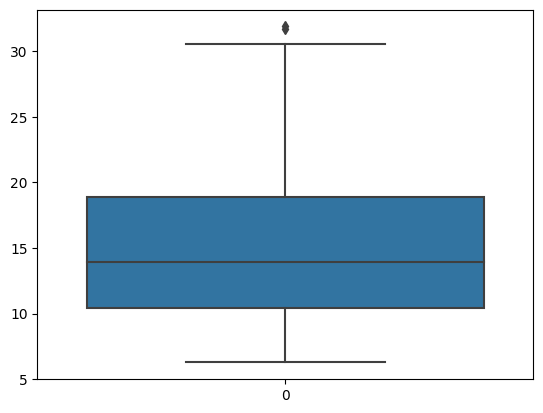

In [10]:
sns.boxplot(df.Na_to_K)

In [11]:
x = df.iloc[:,0:4]
x['Sex'] = x['Sex'].replace({'M':0, 'F':1})
x['BP'] = x['BP'].replace({'HIGH':2, 'LOW':0,'NORMAL':1})
x['Cholesterol'] = x['Cholesterol'].replace({'HIGH':1,'NORMAL':0})
#x = np.asarray(x).astype('float32')
#x = x.values
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(df.iloc[:,5:])
y

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0, 3, 3, 4, 0, 4, 0, 3, 0, 0, 3, 0, 0, 0, 4, 0, 4, 1, 3, 0, 0, 0,
       0, 0, 0, 0, 0, 4, 0, 0, 4, 2, 4, 0, 4, 4, 1, 4, 4, 4, 0, 2, 0, 4,
       4, 4, 1, 3, 0, 0, 0, 4, 0, 0, 2, 3, 2, 0, 4, 0, 0, 1, 0, 4, 2, 0,
       1, 4, 0, 0, 2, 0, 4, 0, 0, 0, 1, 0, 1, 4, 2, 4, 3, 1, 3, 2, 4, 0,
       0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 1, 1, 3, 4, 0, 4, 4, 0, 2, 0,
       1, 4, 4, 4, 4, 0, 4, 4, 1, 0, 0, 0, 0, 0, 2, 0, 0, 4, 0, 4, 0, 0,
       4, 0, 0, 4, 2, 1, 2, 4, 1, 0, 2, 0, 1, 4, 4, 1, 4, 3, 1, 2, 4, 4,
       0, 3, 1, 0, 3, 4, 4, 2, 4, 0, 0, 0, 0, 4, 0, 1, 4, 4, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 4, 4, 0, 0, 0, 2, 1, 0, 0, 0, 1, 0, 3, 0, 3, 3, 4,
       4, 4])

In [12]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=12)

Bulding ANN model

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(8,input_dim = 4,activation = 'relu'))
model.add(Dense(64,activation = 'relu'))
model.add(Dense(32,activation = 'relu'))
model.add(Dense(16,activation = 'relu'))
model.add(Dense(5,activation = 'softmax'))

In [14]:
model.compile(optimizer = 'adam',loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])

In [15]:
ytrain.shape

(160,)

In [16]:
model.fit(xtrain,ytrain,batch_size=5,epochs=66,validation_data=(xtest,ytest))

Epoch 1/66
32/32 [==============================] - 2s 10ms/step - loss: 2.1681 - accuracy: 0.1688 - val_loss: 1.4324 - val_accuracy: 0.4000
Epoch 2/66
32/32 [==============================] - 0s 3ms/step - loss: 1.4093 - accuracy: 0.4688 - val_loss: 1.4320 - val_accuracy: 0.4000
Epoch 3/66
32/32 [==============================] - 0s 3ms/step - loss: 1.3462 - accuracy: 0.4688 - val_loss: 1.3281 - val_accuracy: 0.4000
Epoch 4/66
32/32 [==============================] - 0s 3ms/step - loss: 1.3845 - accuracy: 0.4187 - val_loss: 1.3829 - val_accuracy: 0.4000
Epoch 5/66
32/32 [==============================] - 0s 3ms/step - loss: 1.3156 - accuracy: 0.4688 - val_loss: 1.3248 - val_accuracy: 0.4000
Epoch 6/66
32/32 [==============================] - 0s 3ms/step - loss: 1.2846 - accuracy: 0.4437 - val_loss: 1.2619 - val_accuracy: 0.5250
Epoch 7/66
32/32 [==============================] - 0s 3ms/step - loss: 1.2958 - accuracy: 0.4250 - val_loss: 1.3669 - val_accuracy: 0.4000
Epoch 8/66
32/32 [=

In [17]:

random_data = np.random.rand(1,4)
print(random_data)
#pred = model.predict(random_data)
#pred

[[0.01682032 0.33729107 0.19548932 0.06239998]]


In [18]:
pred = model.predict(random_data)

1/1 [==============================] - 0s 99ms/step


In [19]:
pred_class = np.argmax(pred)
print('Predicted class',pred_class)

Predicted class 4
